

# Axis ticks

The x and y Axis on each Axes have default tick "locators" and "formatters"
that depend on the scale being used (see `user_axes_scales`).  It is
possible to customize the ticks and tick labels with either high-level methods
like `~.axes.Axes.set_xticks` or set the locators and formatters directly on
the axis.

## Manual location and formats

The simplest method to customize the tick locations and formats is to use
`~.axes.Axes.set_xticks` and `~.axes.Axes.set_yticks`.  These can be used on
either the major or the minor ticks.


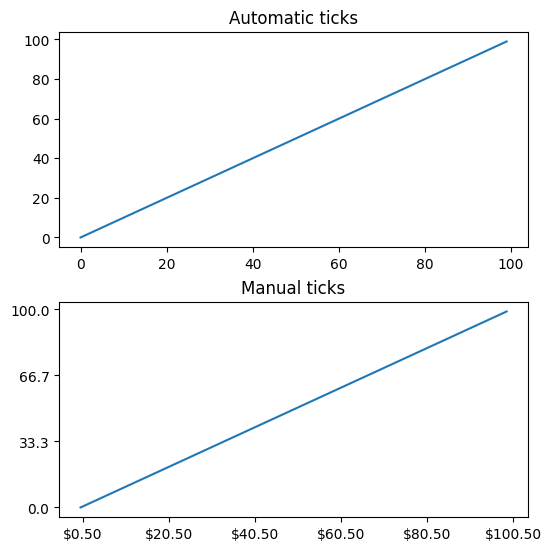

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker


fig, axs = plt.subplots(2, 1, figsize=(5.4, 5.4), layout='constrained')
x = np.arange(100)
for nn, ax in enumerate(axs):
    ax.plot(x, x)
    if nn == 1:
        ax.set_title('Manual ticks')
        ax.set_yticks(np.arange(0, 100.1, 100/3))
        xticks = np.arange(0.50, 101, 20)
        xlabels = [f'\\${x:1.2f}' for x in xticks]
        ax.set_xticks(xticks, labels=xlabels)
    else:
        ax.set_title('Automatic ticks')

Note that the length of the ``labels`` argument must have the same length as
the array used to specify the ticks.

By default `~.axes.Axes.set_xticks` and `~.axes.Axes.set_yticks` act on the
major ticks of an Axis, however it is possible to add minor ticks:



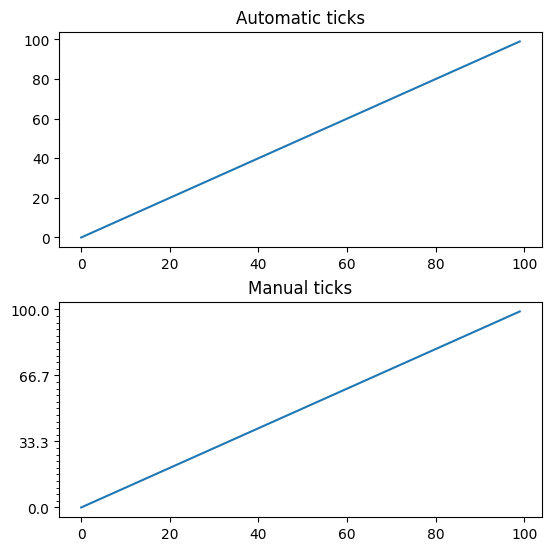

In [2]:
fig, axs = plt.subplots(2, 1, figsize=(5.4, 5.4), layout='constrained')
x = np.arange(100)
for nn, ax in enumerate(axs):
    ax.plot(x, x)
    if nn == 1:
        ax.set_title('Manual ticks')
        ax.set_yticks(np.arange(0, 100.1, 100/3))
        ax.set_yticks(np.arange(0, 100.1, 100/30), minor=True)
    else:
        ax.set_title('Automatic ticks')

## Locators and Formatters

Manually setting the ticks as above works well for specific final plots, but
does not adapt as the user interacts with the Axes.   At a lower level,
Matplotlib has ``Locators`` that are meant to automatically choose ticks
depending on the current view limits of the axis, and ``Formatters`` that are
meant to format the tick labels automatically.

The full list of locators provided by Matplotlib are listed at
`locators`, and the formatters at `formatters`.



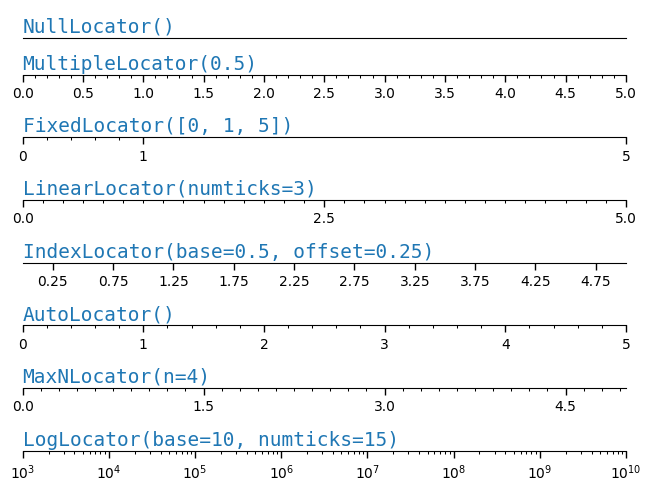

In [3]:
def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


fig, axs = plt.subplots(8, 1, layout='constrained')

# Null Locator
setup(axs[0], title="NullLocator()")
axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[0].xaxis.set_minor_locator(ticker.NullLocator())

# Multiple Locator
setup(axs[1], title="MultipleLocator(0.5)")
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# Fixed Locator
setup(axs[2], title="FixedLocator([0, 1, 5])")
axs[2].xaxis.set_major_locator(ticker.FixedLocator([0, 1, 5]))
axs[2].xaxis.set_minor_locator(ticker.FixedLocator(np.linspace(0.2, 0.8, 4)))

# Linear Locator
setup(axs[3], title="LinearLocator(numticks=3)")
axs[3].xaxis.set_major_locator(ticker.LinearLocator(3))
axs[3].xaxis.set_minor_locator(ticker.LinearLocator(31))

# Index Locator
setup(axs[4], title="IndexLocator(base=0.5, offset=0.25)")
axs[4].plot(range(0, 5), [0]*5, color='white')
axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=0.5, offset=0.25))

# Auto Locator
setup(axs[5], title="AutoLocator()")
axs[5].xaxis.set_major_locator(ticker.AutoLocator())
axs[5].xaxis.set_minor_locator(ticker.AutoMinorLocator())

# MaxN Locator
setup(axs[6], title="MaxNLocator(n=4)")
axs[6].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[6].xaxis.set_minor_locator(ticker.MaxNLocator(40))

# Log Locator
setup(axs[7], title="LogLocator(base=10, numticks=15)")
axs[7].set_xlim(10**3, 10**10)
axs[7].set_xscale('log')
axs[7].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
plt.show()

Similarly, we can specify "Formatters" for the major and minor ticks on each
axis.

The tick format is configured via the function `~.Axis.set_major_formatter`
or `~.Axis.set_minor_formatter`. It accepts:

- a format string, which implicitly creates a `.StrMethodFormatter`.
- a function,  implicitly creates a `.FuncFormatter`.
- an instance of a `.Formatter` subclass. The most common are

  - `.NullFormatter`: No labels on the ticks.
  - `.StrMethodFormatter`: Use string `str.format` method.
  - `.FormatStrFormatter`: Use %-style formatting.
  - `.FuncFormatter`: Define labels through a function.
  - `.FixedFormatter`: Set the label strings explicitly.
  - `.ScalarFormatter`: Default formatter for scalars: auto-pick the format string.
  - `.PercentFormatter`: Format labels as a percentage.

See `formatters` for the complete list.



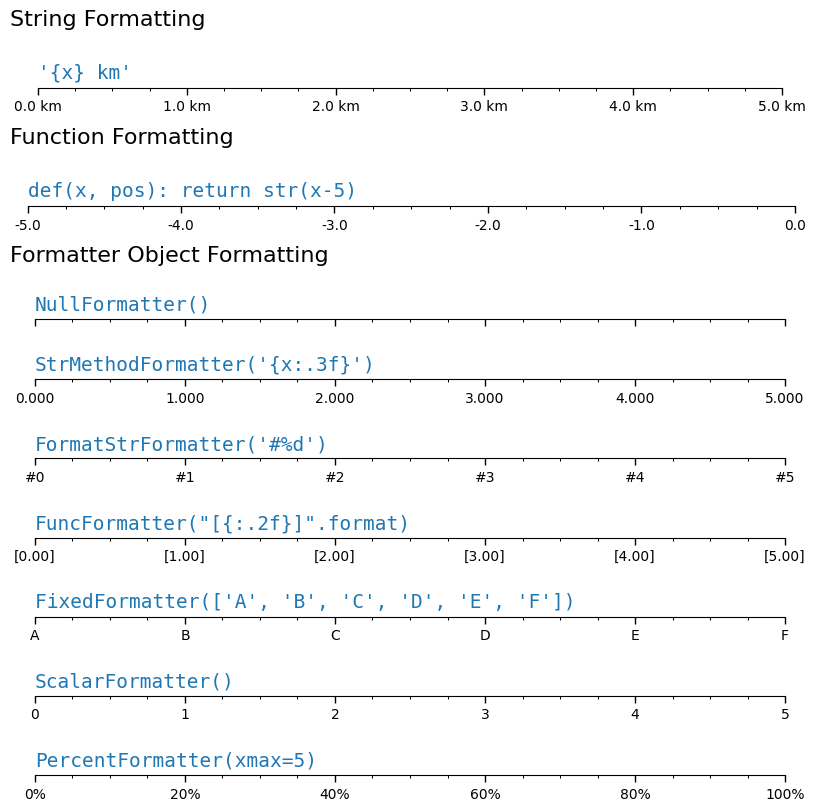

In [4]:
def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


fig = plt.figure(figsize=(8, 8), layout='constrained')
fig0, fig1, fig2 = fig.subfigures(3, height_ratios=[1.5, 1.5, 7.5])

fig0.suptitle('String Formatting', fontsize=16, x=0, ha='left')
ax0 = fig0.subplots()

setup(ax0, title="'{x} km'")
ax0.xaxis.set_major_formatter('{x} km')

fig1.suptitle('Function Formatting', fontsize=16, x=0, ha='left')
ax1 = fig1.subplots()

setup(ax1, title="def(x, pos): return str(x-5)")
ax1.xaxis.set_major_formatter(lambda x, pos: str(x-5))

fig2.suptitle('Formatter Object Formatting', fontsize=16, x=0, ha='left')
axs2 = fig2.subplots(7, 1)

setup(axs2[0], title="NullFormatter()")
axs2[0].xaxis.set_major_formatter(ticker.NullFormatter())

setup(axs2[1], title="StrMethodFormatter('{x:.3f}')")
axs2[1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))

setup(axs2[2], title="FormatStrFormatter('#%d')")
axs2[2].xaxis.set_major_formatter(ticker.FormatStrFormatter("#%d"))


def fmt_two_digits(x, pos):
    return f'[{x:.2f}]'


setup(axs2[3], title='FuncFormatter("[{:.2f}]".format)')
axs2[3].xaxis.set_major_formatter(ticker.FuncFormatter(fmt_two_digits))

setup(axs2[4], title="FixedFormatter(['A', 'B', 'C', 'D', 'E', 'F'])")
# FixedFormatter should only be used together with FixedLocator.
# Otherwise, one cannot be sure where the labels will end up.
positions = [0, 1, 2, 3, 4, 5]
labels = ['A', 'B', 'C', 'D', 'E', 'F']
axs2[4].xaxis.set_major_locator(ticker.FixedLocator(positions))
axs2[4].xaxis.set_major_formatter(ticker.FixedFormatter(labels))

setup(axs2[5], title="ScalarFormatter()")
axs2[5].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

setup(axs2[6], title="PercentFormatter(xmax=5)")
axs2[6].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))

## Styling ticks (tick parameters)

The appearance of ticks can be controlled at a low level by finding the
individual `~.axis.Tick` on the axis.  However, usually it is simplest to
use `~.axes.Axes.tick_params` to change all the objects at once.

The ``tick_params`` method can change the properties of ticks:

- length
- direction (in or out of the frame)
- colors
- width and length
- and whether the ticks are drawn at the bottom, top, left, or right of the
  Axes.

It also can control the tick labels:

- labelsize (fontsize)
- labelcolor (color of the label)
- labelrotation
- labelbottom, labeltop, labelleft, labelright

In addition there is a *pad* keyword argument that specifies how far the tick
label is from the tick.

Finally, the grid linestyles can be set:

- grid_color
- grid_alpha
- grid_linewidth
- grid_linestyle

All these properties can be restricted to one axis, and can be applied to
just the major or minor ticks



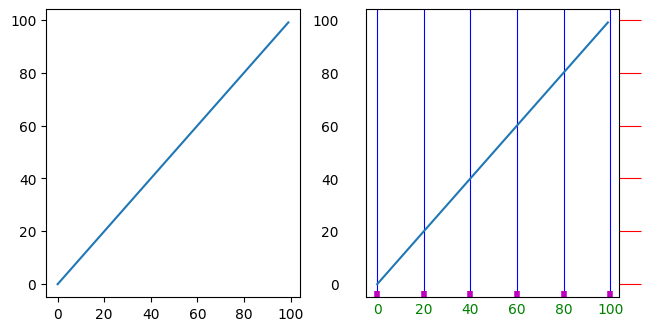

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3.2), layout='constrained')

for nn, ax in enumerate(axs):
    ax.plot(np.arange(100))
    if nn == 1:
        ax.grid('on')
        ax.tick_params(right=True, left=False, axis='y', color='r', length=16,
                       grid_color='none')
        ax.tick_params(axis='x', color='m', length=4, direction='in', width=4,
                       labelcolor='g', grid_color='b')